In [4]:
import numpy as np
from numpy.random import exponential as exp
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [182]:
def num_tested(X,T,lams):
    s,i,r = X
    ls,li,lr = lams
    s_draw = exp(ls,int(s))
    i_draw = exp(li,int(i))
    r_draw = exp(lr,int(r))
    
    all_draw = np.concatenate([s_draw,i_draw,r_draw])
    top_T = np.sort(all_draw)[-T:]
    
    s_tested = sum([(sd in top_T) for sd in s_draw])
    i_tested = sum([(idr in top_T) for idr in i_draw])
    r_tested = sum([(rd in top_T) for rd in r_draw])
    
    return s_tested,i_tested,r_tested

In [155]:
def SIR_model(t,X,params):
    beta,gamma = params
    N = sum(X)
    s,i,r = X
    dsdt = -beta*s*i/N
    didt = -dsdt - gamma*i
    drdt = gamma*i
    return [dsdt,didt,drdt]

In [201]:
N = 10000
init_inf = 0.01
s0 = (1-init_inf)*N
i0 = init_inf*N
r0 = 0
bet = 15
gam = 7

In [202]:
sir_sol = ode(SIR_model)
sir_sol.set_f_params(np.array([bet,gam]))
sir_sol.set_initial_value([s0,i0,r0],0)

In [203]:
end_time = 1.8
tst = 0.01
t0 = 0

In [204]:
time_array = np.array([t0])
sol_list = [[s0,i0,r0]]
for tpt in np.arange(t0,end_time,tst):
    s,i,r = sir_sol.integrate(sir_sol.t + tst)
    sol_list = sol_list + [[s,i,r]]
    time_array = np.append(time_array,sir_sol.t)
sol_array = np.array(sol_list)
sim_length = len(sol_array)

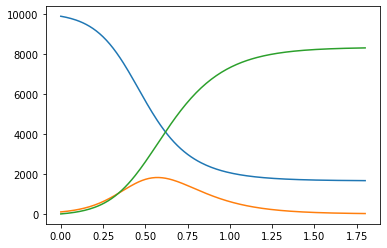

In [205]:
plt.plot(time_array,sol_array.T[0],time_array,sol_array.T[1],time_array,sol_array.T[2])

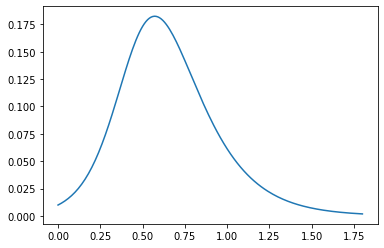

In [206]:
plt.plot(time_array,sol_array.T[1]/N)

In [207]:
l1 = 1
l2 = 1.5
l3 = 0.5

In [208]:
T = [20]*sim_length

In [209]:
tested = np.array([num_tested(sol_array[j],T[j],[l1,l2,l3]) for j in range(sim_length)])

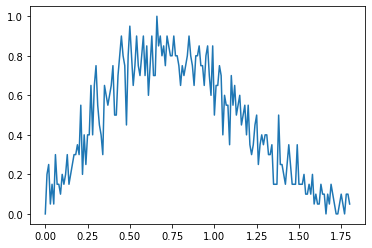

In [210]:
pos_perce = tested.T[1]/T
plt.plot(time_array,pos_perce)

In [300]:
def sim_with_testing(x0,endt,bias,beta,gamma,Lambda):
    s0,i0,r0 = x0
    N = sum(x0)
    sir_sol = ode(SIR_model)
    sir_sol.set_f_params(np.array([beta,gamma]))
    sir_sol.set_initial_value([s0,i0,r0],0)
    time_array = np.array([t0])
    sol_list = [[s0,i0,r0]]
    tested = [[0,0,0]]
    while sir_sol.successful() and sir_sol.t <= endt:
        nxt_test = exp(Lambda)
        s,i,r = sir_sol.integrate(sir_sol.t + nxt_test)
        sol_list = sol_list + [[s,i,r]]
        time_array = np.append(time_array,sir_sol.t)
        
        u = np.random.rand()
        
        N2 = sum([s*bias[0],i*bias[1],r*bias[2]])
        if u < s*bias[0]/N2:
            tested += [np.array(tested[-1]) + np.array([1,0,0])]
        elif u < (s*bias[0] + i*bias[1])/N2:
            tested += [np.array(tested[-1]) + np.array([0,1,0])]
        else:
            tested += [np.array(tested[-1]) + np.array([0,0,1])]
        
    tested_array = np.array(tested)
    sol_array = np.array(sol_list)
    return sol_array,time_array,tested_array
        
    

In [344]:
sim,tim,testing = sim_with_testing([s0,i0,r0],2,[1,1.5,1],bet,gam,1/1000)

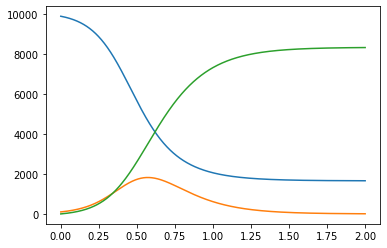

In [345]:
plt.plot(tim,sim.T[0],tim,sim.T[1],tim,sim.T[2])

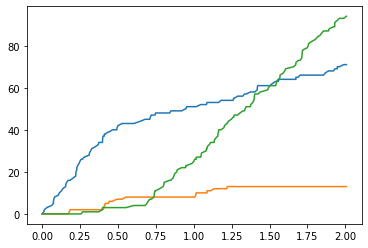

In [308]:
plt.plot(tim,testing.T[0],tim,testing.T[1],tim,testing.T[2])

In [332]:
def per_pos(testing,times,t1,t2):
    t1index = np.where(t1<times)[0][0]
    t2index = np.where(t2<times)[0][0]
    diff = testing[t2index] - testing[t1index]
    return diff[1]/sum(diff)

In [333]:
per_pos(testing,tim,0,1)

0.0963855421686747

In [334]:
len(tim)

179

In [341]:
intervs = np.linspace(0,tim[-1]-0.01,50)
pos_pers = []
for i in range(49):
    pos_pers += [per_pos(testing,tim,intervs[i],intervs[i+1])]

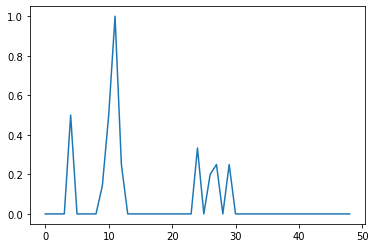

In [343]:
plt.plot(pos_pers)